In [1]:
"""
Notebook utilizado para apresentar uma introdução à teoria da amostragem de sinais.
Criado para a disciplina Geofísica I da Universidade Federal de Uberlândia.

Protegido por licença GPL v3.0. O uso e a reprodução são livres para fins educacionais
desde que citada a fonte.

Prof. Dr. Emerson Rodrigo Almeida
emerson.almeida@ufu.br

Última modificação: 03/02/2021
"""

'\nNotebook utilizado para apresentar uma introdução à teoria da amostragem de sinais.\nCriado para a disciplina Geofísica I da Universidade Federal de Uberlândia.\n\nProtegido por licença GPL v3.0. O uso e a reprodução são livres para fins educacionais\ndesde que citada a fonte.\n\nProf. Dr. Emerson Rodrigo Almeida\nemerson.almeida@ufu.br\n\nÚltima modificação: 02/02/2021\n'

# Instruções iniciais

Neste notebook você irá aprender como a digitalização de um sinal analógico é feita corretamente a partir dos intervalos de amostragem. Para isto leia atentamente as instruções apresentadas antes de cada célula e execute-as uma a uma, para acompanhar o processo corretamente.

Não se preocupe em compreender o código em si, não é obrigatório que você conheça a programação para obter e interpretar os resultados da demonstração. Mesmo assim, sinta-se livre caso queira perguntar qualquer coisa para aprender mais sobre o código e sua elaboração.

### Passo 01 - Preparação

Primeiramente vamos preparar o notebook com os módulos e funções que precisaremos no decorrer da demonstração. A célula abaixo contém as funções utilizadas nos cálculos e as funções utilizadas para gerar as figuras. Execute-a uma vez antes de executar qualquer outra parte do código e **não altere nada no código apresentado na célula**. Você pode executar o código na célula clicando no botão RUN na barra do Jupyter Notebook ou pressionando as teclas SHIFT+ENTER no seu teclado.

In [8]:
from scipy.interpolate import interp1d
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# o que já estiver ok vem pra cá

def gera_onda_quadrada(tt, T):
    return np.sign(np.sin(2 * np.pi * (1/T) * tt))
    

def calcula_serie(tt, nh, T):
    ww = 2 * np.pi * (1/T)          # frequência angular
    y = np.zeros(np.shape(tt))    # inicializa com valores de a0 = 0

    for n in range(nh):
        if n%2 != 0:
            bn = 4.0 / (np.pi * n)
        else:
            bn = 0

        y = y + (bn * np.sin(n * ww * tt))
        
    return y
    
    
def plota_onda_quadrada(tt, sw, titulo):
    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(tt, sw, '-b')
    ax.set_title(titulo, fontsize=14)
    ax.set_xlim([0, tt[-1]])
    ax.set_ylim([-1.2, 1.2])
    ax.set_xlabel("Tempo (s)", fontsize=14)
    ax.set_ylabel("Amplitude (ua)", fontsize=14)
    ax.grid()

    
def plota_serie(tt, s_t, sw, titulo):
    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(tt, sw, '--b', label='Onda quadrada')
    ax.plot(tt, s_t, '-r', label='Série de Fourier')
    ax.set_title(titulo, fontsize=14)
    ax.set_xlim([0, tt[-1]])
    ax.set_ylim([-1.2, 1.2])
    ax.set_xlabel("Tempo (s)", fontsize=14)
    ax.set_ylabel("Amplitude (ua)", fontsize=14)
    ax.grid()
    ax.legend(loc='lower right', fontsize=12)
    

In [13]:
tempo = np.arange(0, 10, 10/1000)
periodo = 2.0

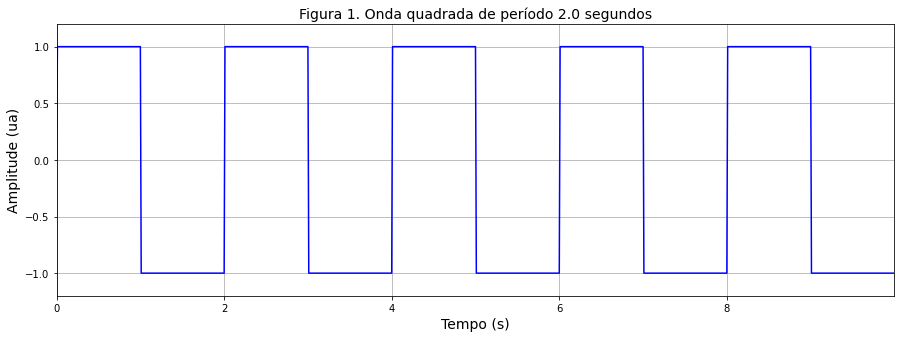

In [14]:
# ONDA QUADRADA
onda = gera_onda_quadrada(tempo, periodo)
plota_onda_quadrada(tempo, onda, "Figura 1. Onda quadrada de período " + str(periodo) + " segundos")

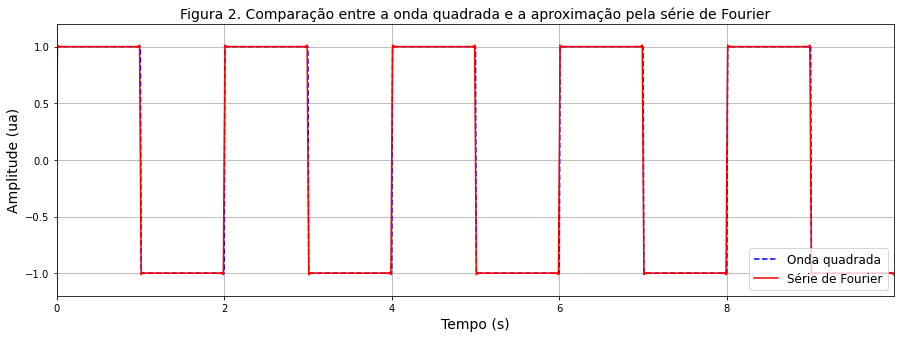

In [19]:
# Serie de Fourier
n_harm = 1500        # número de harmônicos

f_t = calcula_serie(tempo, n_harm, periodo)
plota_serie(tempo, f_t, onda, "Figura 2. Comparação entre a onda quadrada e a aproximação pela série de Fourier")

# Complemento

https://www.khanacademy.org/science/electrical-engineering/ee-signals/ee-fourier-series/v/ee-fourier-coefficients-for-square-wave